In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
sns.set_style('darkgrid')

## Load Dataset


In [3]:
df=pd.read_csv(r'Spotify Song Attributes.csv')

In [4]:
df

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)


In [6]:
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


## Data Cleaning

In [7]:
df.isnull().any()

acousticness        False
danceability        False
duration_ms         False
energy              False
instrumentalness    False
key                 False
liveness            False
loudness            False
mode                False
speechiness         False
tempo               False
time_signature      False
valence             False
target              False
song_title          False
artist              False
dtype: bool

This method checks for duplicate rows in a DataFrame and returns a Boolean Series of the same length as the DataFrame.
The result will be True for each row that is a duplicate of a previous row and False for the first occurrence of that set of duplicate rows or for unique rows.

In [27]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2012    False
2013    False
2014    False
2015    False
2016    False
Length: 2017, dtype: bool

In [28]:
df[df.duplicated()]

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
267,0.096200,0.654,252095,0.292,0.003100,2,0.106,-12.977,1,0.4740,153.547,4.0,0.111,1,River,Ibeyi
508,0.024600,0.586,374133,0.806,0.000167,1,0.353,-9.542,1,0.0548,110.325,4.0,0.207,1,Her Fantasy,Matthew Dear
894,0.000334,0.907,183581,0.616,0.425000,6,0.110,-7.073,0,0.0577,124.036,4.0,0.614,1,Jack,Breach
927,0.934000,0.440,254360,0.433,0.811000,2,0.273,-17.453,0,0.0412,79.952,4.0,0.217,1,Episode I - Duel of The Fates,John Williams
981,0.036900,0.448,258653,0.733,0.042500,3,0.169,-6.238,1,0.0292,142.008,4.0,0.404,1,Myth,Beach House


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [10]:
df.shape

(2017, 16)

In [11]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [12]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


## Data Analysis

### Top 5 most popular artists


In [13]:

top_five_artists= df.groupby('artist')['song_title']
.count().sort_values(ascending=False)[:5]
top_five_artists

artist
Drake              16
Rick Ross          13
Disclosure         12
Backstreet Boys    10
WALK THE MOON      10
Name: song_title, dtype: int64

<Axes: ylabel='artist'>

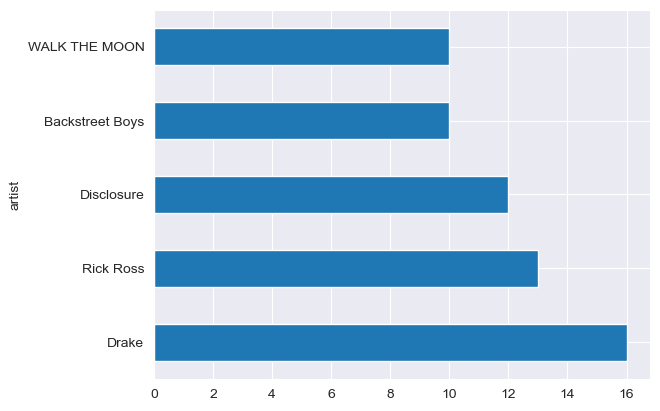

In [14]:
top_five_artists.plot.barh()



### top 5 loudest tracks

In [15]:
top_five_loudest_tracks = df[['loudness','song_title']]
.sort_values(by='loudness',ascending=True)[:5]
top_five_loudest_tracks

,loudness,song_title
1594,-33.097,"Lyric Pieces, Book I Op. 12: I. Arietta"
1596,-31.367,"8 Fantasiestücke, Op.12 : 1. Des Abends"
1598,-31.082,"Piano Quartet in E flat, Op.47: 3. Andante can..."
1531,-30.447,"I Was So Young, and You Were So Beautiful"
1549,-29.460,Eleanor


Text(0.5, 1.0, 'Top 5 loudes tracks')

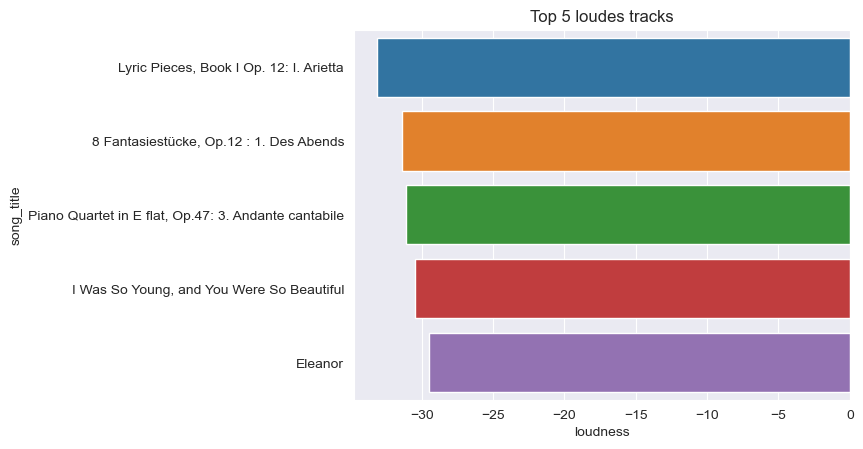

In [16]:
sns.barplot(x='loudness',y='song_title',data=top_five_loudest_tracks)
plt.title('Top 5 loudes tracks')

### Artist with the most danceable song

In [17]:
top_five_artists_danceable_song = df[['artist','song_title','danceability']]
.sort_values(by='danceability',ascending=False)[:5]
top_five_artists_danceable_song

,artist,song_title,danceability
1433,Ben Remember,Flashwind - Radio Edit,0.984
1901,Justin Timberlake,SexyBack,0.967
604,Blaqstarr,Check Me Out Like,0.962
32,Young Thug,Best Friend,0.959
1957,Vanilla Ice,Ice Ice Baby,0.959


Text(0.5, 1.0, 'Artist with the most danceable song')

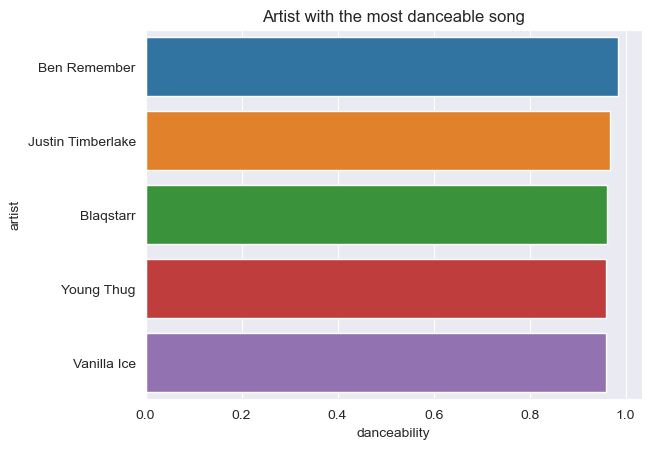

In [18]:
sns.barplot(data=top_five_artists_danceable_song,x='danceability',y='artist')
plt.title('Artist with the most danceable song')

### Top 10 instrumental tracks

In [19]:
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [20]:
top_ten_instrumental_tracks= df[['instrumentalness','song_title']]
.sort_values(by='instrumentalness',ascending=False)[:5]
top_ten_instrumental_tracks

,instrumentalness,song_title
1313,0.976,Senseless Order
271,0.968,So Destroyed (channeling Rage Peace)
1575,0.964,A Hundred Dreams from Now
1619,0.958,Raven
725,0.957,Strandbar (disko)


Text(0.5, 1.0, 'Top 10 instrumental tracks')

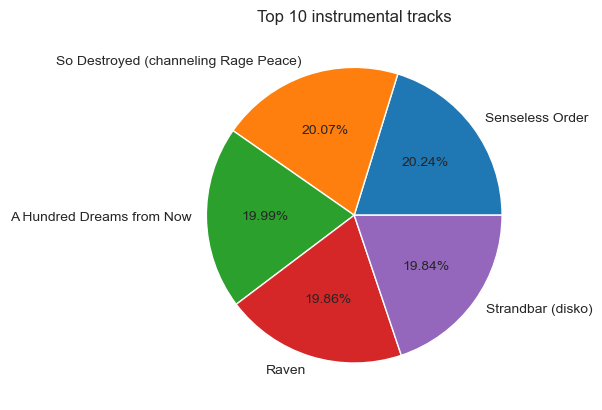

In [21]:
plt.pie(data=top_ten_instrumental_tracks,autopct='%1.2f%%',
        x='instrumentalness',labels='song_title')
plt.title('Top 10 instrumental tracks')


### Multiple features plots

In [22]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [23]:
target_columns=['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness',
       'speechiness', 'tempo', 'valence' ]

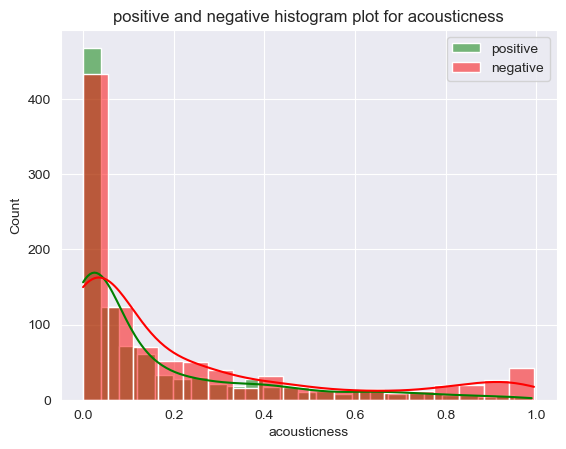

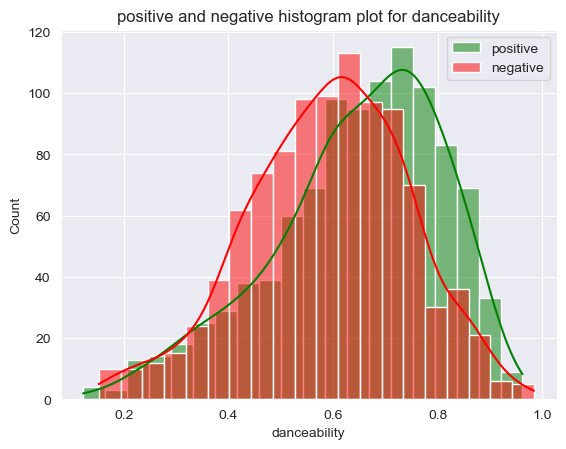

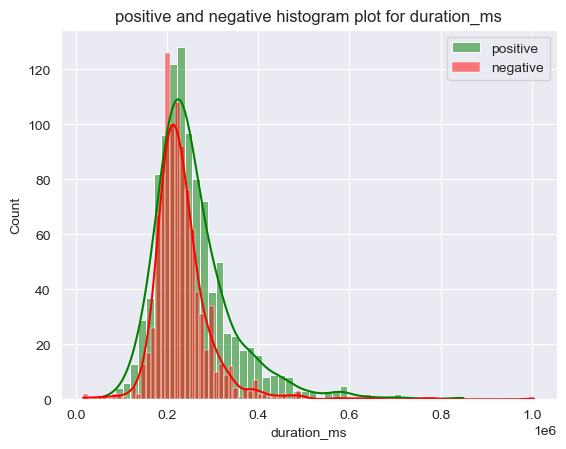

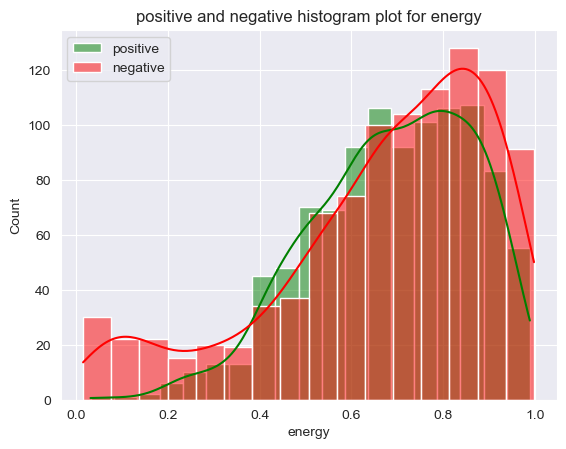

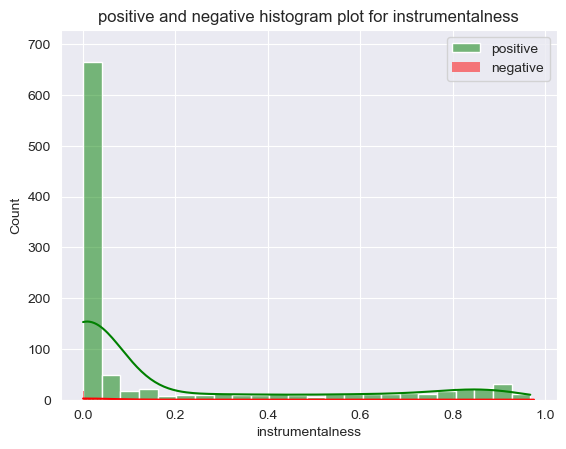

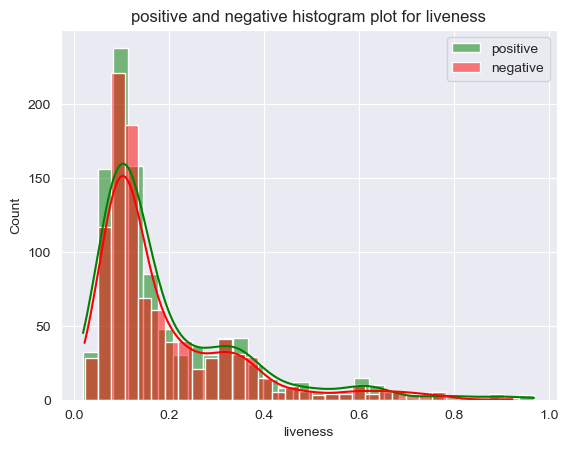

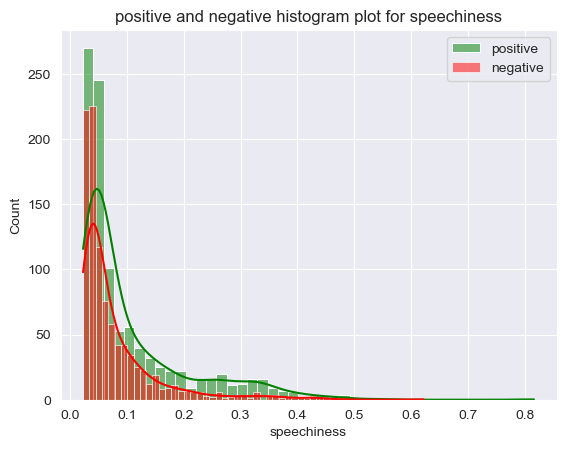

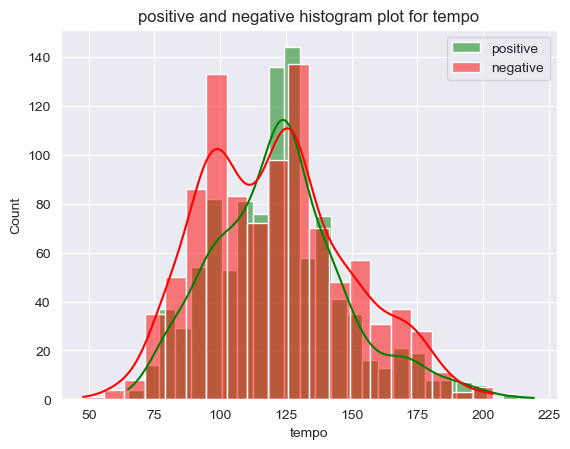

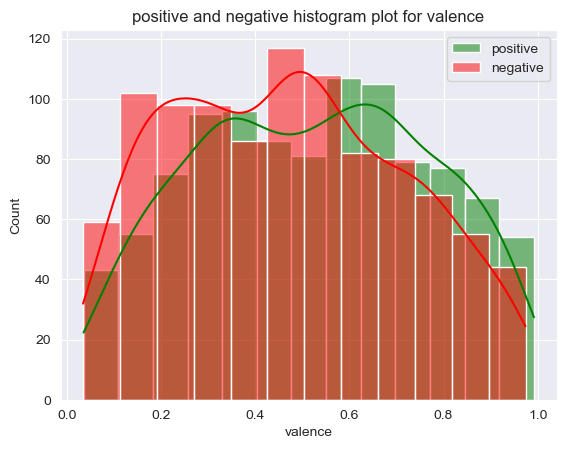

In [24]:
for feature_col in target_columns:
    pos_data=df[df['target']==1][feature_col]
    neg_data=df[df['target']==0][feature_col]
    
    plt.figure()
    sns.histplot(pos_data,label='positive',color='green',kde=True)
    sns.histplot(neg_data,label='negative',color='red',kde=True)
    
    plt.legend()
    plt.title(f'positive and negative histogram plot for {feature_col}')

<Axes: >

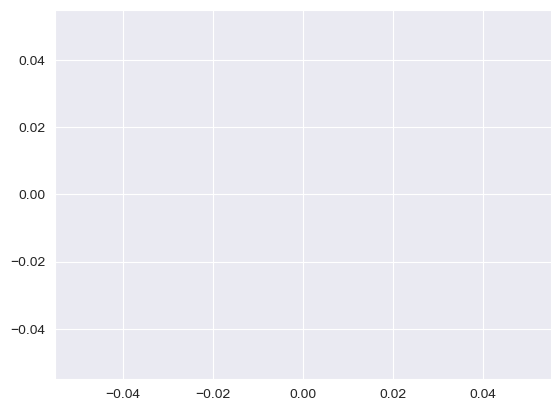

In [25]:
sns.histplot()